# Monte Carlo Markov Chain

Prerequisites: Monte Carlo Calculation of Pi

Author: Christina Lee

### Intro

If you didn't check it out already, take a look at the post that introduces using random numbers in calculations.  Any such simulation is a <i>Monte Carlo</i> simulation.  The most used kind of Monte Carlo simulation is a <i>Markov Chain</i>, also known as a random walk, or drunkard's walk.  A Markov Chain is a series of steps where
* each new state is chosen probabilitically
* the probabilities only depend on the current state (no memory)

Imagine a drunkard trying to walk.  At any one point, they could progress either left or right rather randomly.  Also, just because they had been traveling in a straight line so far does not guaruntee they will continue to do.  They've just had extremely good luck.  

We use Markov Chains to <b>approximate probability distributions</b>.  

To create a good Markov Chain, we need
* <b> Ergodicity</b>: All states can be reached
* <b> Global Balance</b>: A condition that ensures the proper equilibrium distribution

### The Balances

Let $\pi_i$ be the probability that a particle is at site $i$, and $p_{ij}$ be the probability that a particle moves from $i$ to $j$.  Then Global Balance can be written as,

\begin{equation}
\sum\limits_j \pi_i p_{i j} = \sum\limits_j \pi_j p_{j i} \;\;\;\;\; \forall i.
\end{equation}

In non-equation terms, this says the amount of "chain" leaving site $i$ is the same as the amount of "chain" entering site $i$ for every site in equilibrium.  There is no flow.  

Usually though, we actually want to work with a stricter rule than Global Balance, <b> Detailed Balance </b>, written as

\begin{equation}
\pi_i p_{i j} = \pi_j p_{j i}.
\end{equation}

Detailed Balance further constricts the transition probabilities we can assign and makes it easier to design an algorithm. Almost all MCMC algorithms out there use detailed balance, and only lately have certain applied mathematicians begun looking and breaking detailed balance to increase efficiency in certain classes of problems. 

### Today's Test Problem

I will let you know now; this might be one of the most powerful numerical methods you could ever learn.  I was going to put down a list of applications, but the only limit to such a list is your imagination.  

Today though, we will not be trying to predict stock market crashes, calculate the PageRank of a webpage, or calculate the entropy a quantum spin liquid at zero temperature.  We just want to calculate an uniform probability distribution, and look at how Monte Carlo Markov Chains behave.

* We will start with an $l\times l$ grid

* Our chain starts somewhere in that grid

* We can then move up, down, left or right equally 

* If we hit an edge, we come out the opposite side <i>(toroidal boundary conditions)</i>

<b>First question!</b> Is this ergodic?

Yes! Nothing stops us from reaching any location.

<b>Second question!</b> Does this obey detailed balance?

Yes!  In equilibrium, each block has a probability of $\pi_i = \frac{1}{l^2}$, and can travel to any of its 4 neighbors with probability of $p_{ij} = \frac{1}{4}$.  For any two neighbors
\begin{equation}
\frac{1}{l^2}\frac{1}{4} = \frac{1}{l^2}\frac{1}{4},
\end{equation}
and if they are not neighbors,
\begin{equation}
0 = 0.
\end{equation}

In [21]:
#Pkg.add("PyCall")
using PyPlot
using PyCall
@pyimport IPython.display as d

In [4]:
# This is just the equivalent of `mod`
# for using in an array that indexes from 1.   
function armod(i,j)
    return (mod(i-1+j,j)+1)  
end

armod (generic function with 1 method)

In [11]:
# input the size of the grid
l=5;
n=l^2;

In [12]:
function Transition(i)
    #randomly chose up, down, left or right
    d=rand(1:4);
    if d==1 #if down
        return armod(i-l,n);
        
    elseif d==2 #if left
        row=convert(Int,floor((i-1)/l));
        return armod(i-1,l)+l*row;
        
    elseif d==3 #if right
        row=convert(Int,floor((i-1)/l));
        return armod(i+1,l)+l*row;
        
    else  # otherwise up
        return armod(i+l,n);
    end    
end

Transition (generic function with 1 method)

In [13]:
# The centers of blocks.
# Will be using for pictoral purposes

pos=zeros(Float64,2,n);
pos[1,:]=[floor((i-1)/l) for i in 1:n]+.5;
pos[2,:]=[mod(i-1,l) for i in 1:n]+.5;

In [17]:
# How many timesteps
tn=2000;

# Array of timesteps
ti=Array{Int64,1}()
# Array of errors
err=Array{Float64,1}()

# Stores current location, initialized randomly
current=rand(1:n);
# Stores last location, used for pictoral purposes
last=current;

#Keeps track of where chain went
Naccumulated=zeros(Int64,l,l);

# put in our first point
# can index 2d array as 1d
Naccumulated[current]+=1;

# A graph will open up where we can watch the chain
pygui(true)
w, h = plt[:figaspect](.4)
figure(figsize=(w,h))

for ii in 1:tn
    
    last=current;
    # Determine the new point
    current=Transition(current);
    Naccumulated[current]+=1;
    
    # add new time steps and error points
    push!(ti,ii)
    push!(err,round(std(Naccumulated/ii),5))
    
    if false
        clf() #clean previous figure
    
        subplot(121) #subplot 1

        title("t: $ii std: $(err[end])")
        pcolor(Naccumulated/ii-1/n,cmap="RdBu",vmin=-.1,vmax=.1)
        colorbar()
    
        # An arrow from the previous point to the current point
        annotate("",
        xy=pos[:,current],
        xytext=pos[:,last],
        xycoords="data",
        arrowprops=Dict("facecolor"=>"green"))
    
        subplot(122) #subplot 2
        title("Error")
        xlabel("Step")
        ylabel("Log10 std")
        scatter(ti,log10(err))

        #how long to wait between showing steps (in seconds)
        sleep(.5)
    end
end

2016-03-24 21:35:26.019 julia[12690:149394] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-03-24 21:35:26.022 julia[12690:149394] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


If your video is not working right, check out the youtube video I assembled of a 6x6 grid.

I'm used `PyCall` to import `IPython.display` above, and here we use the python function `YouTubeVideo`.  One great thing about Julia is its ability to the supplement itself with other extremely well developed languages.  

In [ ]:
d.YouTubeVideo("gxX3Fu1uuCs")

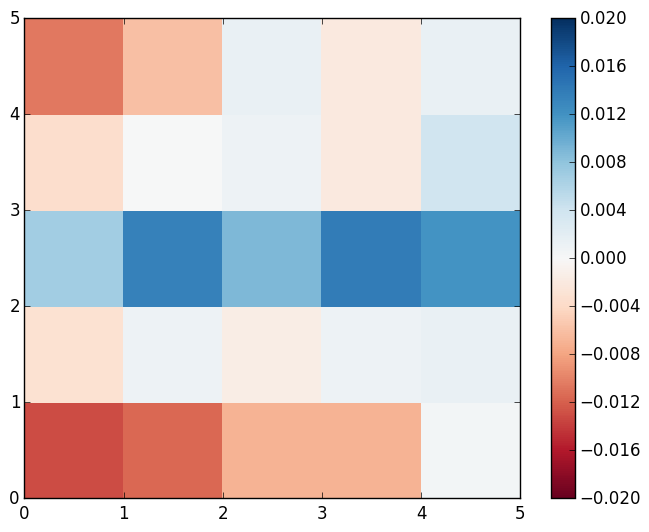

PyObject <matplotlib.colorbar.Colorbar instance at 0x32717c440>

In [18]:
pygui(false)
pcolor(Naccumulated/tn-1/n,cmap="RdBu",vmin=-.02,vmax=.02)
colorbar()

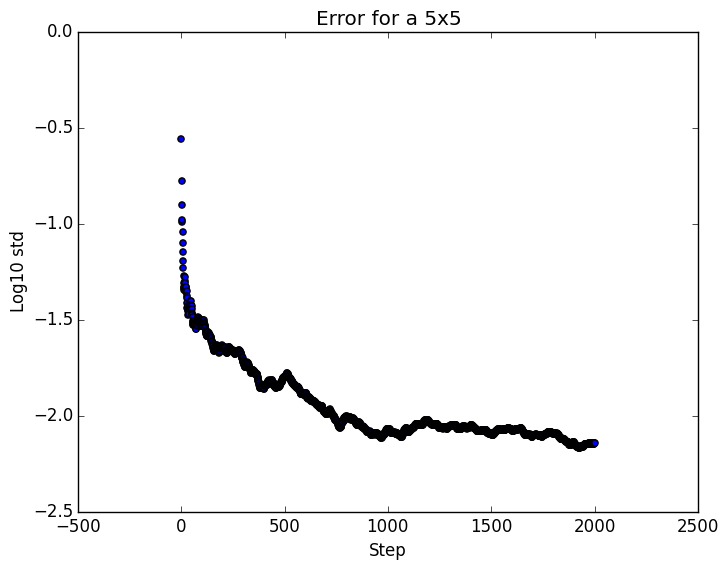

PyObject <matplotlib.collections.PathCollection object at 0x327236f90>

In [23]:
title("Error for a 5x5")
xlabel("Step")
ylabel("Log10 std")
scatter(ti,log10(err))

So, after running the above code and trying to figure out how it works (mostly plotting stuff), go back and study some properties of the system.

* How long does it take to forget it's initial position?

* How does the behaviour change with system size?

* How long would you have to go to get a certain accuracy? (especially if you didn't know what distribution you where looking for)

So hopefully you enjoyed this tiny introduction to an incredibly rich subject.  Feel free to explore all the nooks and crannies to really understand the basics of this kind of simulation, so you can gain more control over the more complex simulations.  

Monte Carlo simulations are as much of an art as a science.  You need to live them, love them, and breathe them till you find out exactly why they are behaving like little kittens that can finally jump on top of your countertops, or open your bedroom door at 1am. 

For all their mishaving, you love the kittens anyway.


In [20]:
Naccumulated/tn-1/n

5x5 Array{Float64,2}:
 -0.013   -0.0115  -0.007   -0.007  0.0005
 -0.003    0.001   -0.0015   0.001  0.0015
  0.007    0.0135   0.009    0.014  0.012 
 -0.0035   0.0      0.001   -0.002  0.004 
 -0.0105  -0.006    0.0015  -0.002  0.0015

In [ ]:
log10(std(Naccumulated/tn-1/9))